<a href="https://colab.research.google.com/github/saktiworkstation/road-to-ai-developer/blob/main/Korelasi_keluarga_pendidikan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import r2_score

In [3]:
df = pd.read_csv('/content/data_korelasi_keluarga_pendidikan.csv')

In [4]:
# Menampilkan beberapa baris pertama data
print(df.head())

  Family_ID Parent_Education_Level  Family_Income  Number_of_Children  \
0  FAM-0001                    SMA       13095156                   4   
1  FAM-0002               Magister       13137789                   1   
2  FAM-0003                Diploma        9974047                   2   
3  FAM-0004                    SMA       12639250                   1   
4  FAM-0005                Diploma       17097555                   1   

  Home_Environment Parental_Involvement Access_to_Internet  Child_Age  \
0     Unsupportive                  Low                Yes          9   
1       Supportive                 High                 No         13   
2       Supportive                  Low                Yes         16   
3     Unsupportive             Moderate                 No         16   
4          Neutral             Moderate                 No         15   

  Child_Education_Level Academic_Performance Extracurricular_Activities  
0                    SD                 Poor    

In [6]:
#cek tipe data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Family_ID                   1000 non-null   object
 1   Parent_Education_Level      1000 non-null   object
 2   Family_Income               1000 non-null   int64 
 3   Number_of_Children          1000 non-null   int64 
 4   Home_Environment            1000 non-null   object
 5   Parental_Involvement        1000 non-null   object
 6   Access_to_Internet          1000 non-null   object
 7   Child_Age                   1000 non-null   int64 
 8   Child_Education_Level       1000 non-null   object
 9   Academic_Performance        1000 non-null   object
 10  Extracurricular_Activities  1000 non-null   object
dtypes: int64(3), object(8)
memory usage: 86.1+ KB


In [7]:
# Mengubah kolom kategorikal menjadi numerik menggunakan LabelEncoder
le = LabelEncoder()
for column in ['Parent_Education_Level', 'Home_Environment', 'Parental_Involvement', 'Child_Education_Level', 'Academic_Performance', 'Extracurricular_Activities']:
    df[column] = le.fit_transform(df[column])

In [13]:
# Menghapus kolom 'Family_ID' karena ga guna
if 'Family_ID' in df.columns:
    df = df.drop(columns=['Family_ID'])

In [16]:
# Menghitung korelasi antar variabel
correlation_matrix = df.corr(numeric_only=True)
print("Correlation Matrix:\n", correlation_matrix)

Correlation Matrix:
                             Parent_Education_Level  Family_Income  \
Parent_Education_Level                    1.000000       0.010153   
Family_Income                             0.010153       1.000000   
Number_of_Children                        0.015788      -0.005473   
Home_Environment                         -0.014493       0.016945   
Parental_Involvement                     -0.040012       0.000383   
Child_Age                                -0.048601      -0.011138   
Child_Education_Level                    -0.001606       0.032946   
Academic_Performance                     -0.018286       0.008291   
Extracurricular_Activities                0.004115       0.066303   

                            Number_of_Children  Home_Environment  \
Parent_Education_Level                0.015788         -0.014493   
Family_Income                        -0.005473          0.016945   
Number_of_Children                    1.000000         -0.000730   
Home_Environment

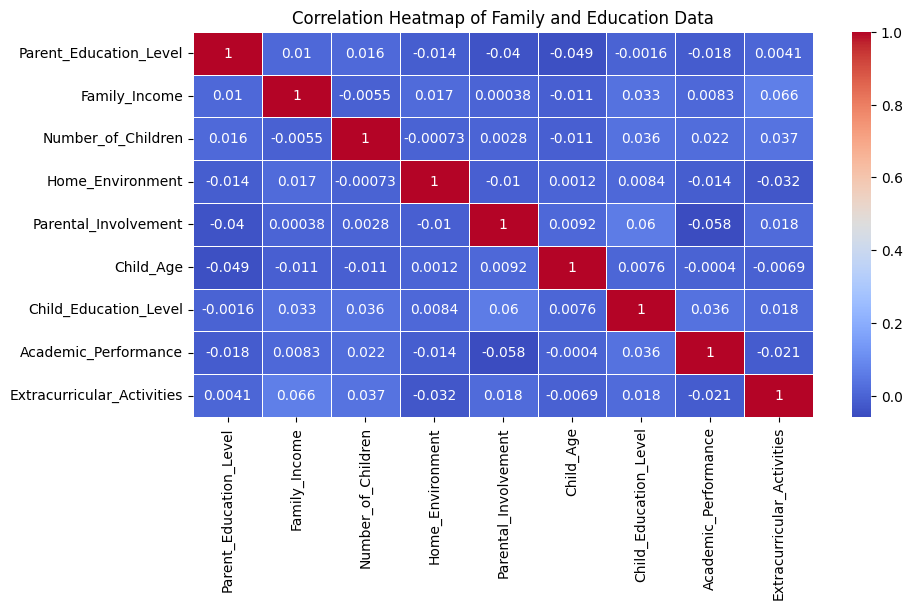

In [18]:
# Visualisasi korelasi menggunakan heatmap
plt.figure(figsize=(10, 5))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of Family and Education Data')
plt.show()

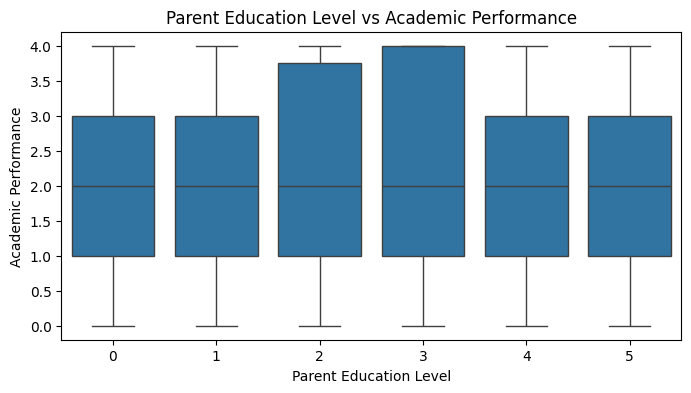

In [20]:
# Visualisasi distribusi tingkat pendidikan orang tua terhadap pencapaian akademik anak
plt.figure(figsize=(8, 4))
sns.boxplot(x='Parent_Education_Level', y='Academic_Performance', data=df)
plt.title('Parent Education Level vs Academic Performance')
plt.xlabel('Parent Education Level')
plt.ylabel('Academic Performance')
plt.show()

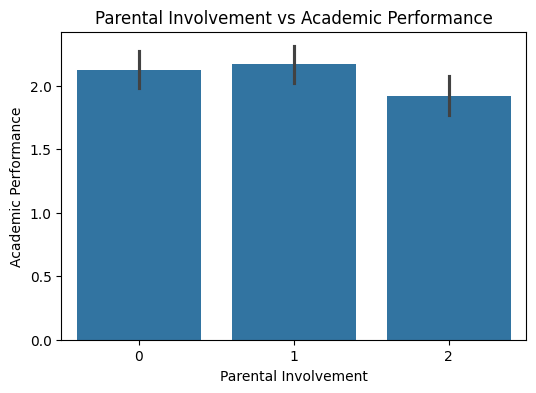

In [22]:
# Visualisasi keterlibatan orang tua terhadap pencapaian akademik anak
plt.figure(figsize=(6, 4))
sns.barplot(x='Parental_Involvement', y='Academic_Performance', data=df)
plt.title('Parental Involvement vs Academic Performance')
plt.xlabel('Parental Involvement')
plt.ylabel('Academic Performance')
plt.show()

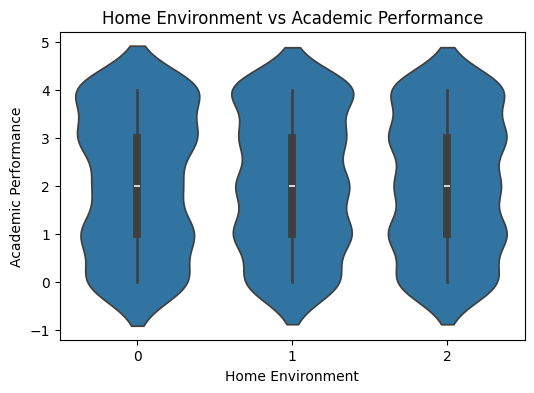

In [23]:
# Visualisasi lingkungan rumah terhadap pencapaian akademik anak
plt.figure(figsize=(6, 4))
sns.violinplot(x='Home_Environment', y='Academic_Performance', data=df)
plt.title('Home Environment vs Academic Performance')
plt.xlabel('Home Environment')
plt.ylabel('Academic Performance')
plt.show()

In [25]:
# Mengubah kolom 'Access_to_Internet' menjadi numerik
# Mengganti 'Yes' dengan 1 dan 'No' dengan 0
df['Access_to_Internet'] = df['Access_to_Internet'].replace({'Yes': 1, 'No': 0})

# Membuat model Linear Regression
X = df[['Parent_Education_Level', 'Family_Income', 'Parental_Involvement', 'Home_Environment', 'Access_to_Internet', 'Extracurricular_Activities']]
y = df['Academic_Performance']

# Membagi data menjadi fitur dan target
model = LinearRegression()
model.fit(X, y)

<ipython-input-25-922fe92df745>:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Access_to_Internet'] = df['Access_to_Internet'].replace({'Yes': 1, 'No': 0})


LinearRegression()

In [26]:
# Prediksi menggunakan model
y_pred = model.predict(X)

R^2 Score: 0.00


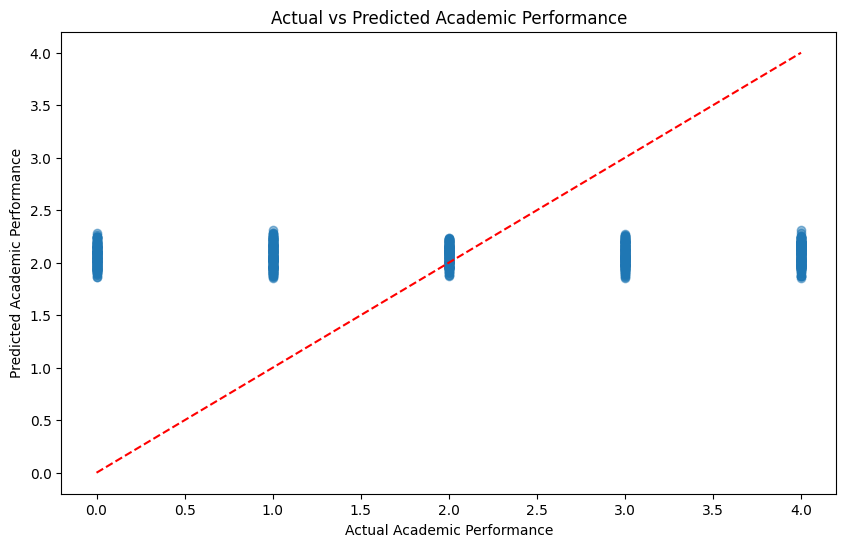

In [27]:
# Menghitung nilai R^2 untuk menentukan seberapa baik model memprediksi
r2 = r2_score(y, y_pred)
print(f'R^2 Score: {r2:.2f}')

# Visualisasi hasil regresi
plt.figure(figsize=(10, 6))
plt.scatter(y, y_pred, alpha=0.5)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.xlabel('Actual Academic Performance')
plt.ylabel('Predicted Academic Performance')
plt.title('Actual vs Predicted Academic Performance')
plt.show()